In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE

In [2]:
# Read-in Personal Listening History
df = pd.read_csv("data/StreamingHistory.csv")
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-06-03 11:46,Khalid,Better,151634
1,2021-06-20 11:52,AP Dhillon,Insane,8434
2,2021-06-20 11:52,Tedi Pagg,Tu Hi Das De,172831
3,2021-06-20 11:57,AP Dhillon,Insane,206060
4,2021-06-20 12:01,Hozier,Take Me To Church,241688


In [3]:
# Renaming the column names
df = df.rename(columns={"artistName":"artist","endTime":"date","trackName":"track"})

I will define a favorite song as a song with 15 or more listens and create a new dataframe that contains only those songs.

Why did we choose 15?

As seen from the histogram below, the first major drop in song frequencies comes around 15. This enables me to eliminate many songs that may cause the model to be more complicated and also prevents me from taking into account songs that I may have accidently listened to on the radio instead of intentionally listening to it.

Text(0.5, 1.0, "Choosing what is a 'favorite' song")

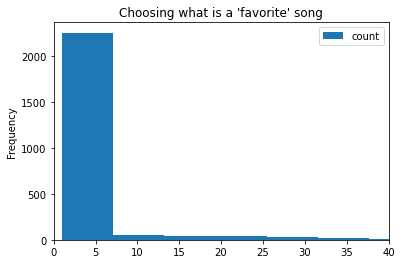

In [4]:

ax = df.groupby(['artist','track']).size().to_frame('count').reset_index().plot(kind='hist',bins=9)
ax.set_xlim(0,40)
ax.set_title("Choosing what is a 'favorite' song")

In [5]:
# Find number of occurences of each song, and keep songs with 15 or more listnes
df.groupby(['artist','track']).size().to_frame('count').reset_index()
df = df.groupby(['artist','track']).size().to_frame('count').reset_index()
df = df[df['count']>=10]
# To display the top 5 rows
df.head(5)

,artist,track,count
21,A.R. Rahman,Nadaan Parinde,20
28,A.R. Rahman,Tere Bina,15
33,A.R. Rahman,Tum Tak,16
54,AP Dhillon,Insane,27
60,AP Dhillon,SPACESHIP,36


In [6]:
df.head(50)

,artist,track,count
21,A.R. Rahman,Nadaan Parinde,20
28,A.R. Rahman,Tere Bina,15
33,A.R. Rahman,Tum Tak,16
54,AP Dhillon,Insane,27
60,AP Dhillon,SPACESHIP,36
62,AP Dhillon,TERE TE,26
92,Aditya Rikhari,Faasle,33
93,Aditya Rikhari,Kya Karein,25
95,Aditya Yadav,Deewane Hum Nahi,19
96,Aditya Yadav,Tere Ishq Mein,13


In [7]:
df.head(10)

,artist,track,count
21,A.R. Rahman,Nadaan Parinde,20
28,A.R. Rahman,Tere Bina,15
33,A.R. Rahman,Tum Tak,16
54,AP Dhillon,Insane,27
60,AP Dhillon,SPACESHIP,36
62,AP Dhillon,TERE TE,26
92,Aditya Rikhari,Faasle,33
93,Aditya Rikhari,Kya Karein,25
95,Aditya Yadav,Deewane Hum Nahi,19
96,Aditya Yadav,Tere Ishq Mein,13


In [8]:
# Read-in Song Features dataset
features = pd.read_csv("data/SpotifyAudioFeaturesApril2019.csv")
# renaming columns
features = features.rename(columns={"artist_name":"artist","track_name":"track"})
features.head(5)

,artist,track_id,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


The 'favorite' column will be the variable that I will try to predict.

In [9]:
# Create 'favorite' column (favorite = 1, not favorite = 0)
features['same_artists'] = features.artist.isin(df.artist) 
features['same_track'] = features.track.isin(df.track) 
features["favorite"] = np.where((features["same_artists"] == True) & (features["same_track"] == True),1,0) # If both instances are True.
features = features.drop(["same_artists","same_track"],axis=1)

In [10]:
# For future use
future = features.copy(deep=True)

In [11]:
# Genre 
features.genre.unique()

AttributeError: 'DataFrame' object has no attribute 'genre'

In [12]:
features

,artist,track_id,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,favorite
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15,0
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56,0
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57,0
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60,0
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47,0
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50,0


Comedy stands out to me the most as I want to know if 'songs' in this genre are actually songs.

In [ ]:
features[features.genre == 'Comedy'].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,favorite
count,9681.000000,9681.000000,9681.000000,9.681000e+03,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.0
mean,21.342630,0.793098,0.559038,2.353052e+05,0.676094,0.000574,0.724775,-11.689321,0.853532,98.235488,0.412764,0.0
std,8.428764,0.130313,0.089625,2.502539e+05,0.211705,0.009987,0.223437,4.777983,0.205918,27.839986,0.207258,0.0
min,0.000000,0.000363,0.239000,3.004000e+04,0.001410,0.000000,0.025800,-31.047000,0.023000,32.451000,0.023700,0.0
25%,15.000000,0.753000,0.499000,1.218800e+05,0.522000,0.000000,0.662000,-14.649000,0.888000,79.720000,0.252000,0.0
50%,20.000000,0.819000,0.561000,1.890570e+05,0.704000,0.000000,0.767000,-11.209000,0.928000,90.124000,0.410000,0.0
75%,26.000000,0.872000,0.620000,2.812930e+05,0.859000,0.000000,0.898000,-8.088000,0.944000,115.128000,0.561000,0.0
max,61.000000,0.995000,0.898000,5.552917e+06,0.998000,0.352000,0.996000,-0.255000,0.967000,207.157000,0.980000,0.0


From this chart, I can look at the values in instrumentalness, liveness, and speechiness to deduce that there are almost no instrumentals, the recording is highly probable to be in front of a live audience, and that it contains a lot words. As a result, I can conclude that the 'songs' in the comedy genre are snippets from comedy shows put on Spotify. Therefore, I will be removing all 'songs' from this genre because they do not accurately represent music and will distort the model with its features.

In [13]:

# Track_id
features = features.drop(columns='track_id')

Since all track_ids are unique and track_id merely represents both artist and song name, I will not able to use this feature to predict a favorite song as it is repetitious. We can drop this feature

In [14]:
features = features.drop(columns='track')

As more than half of the data in the 'track' columns are unique, I believe that there will be a very low correlation between 'track' and 'favorite'. I will also drop this column.

In [15]:
features.head(1)

,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,favorite
0,YG,0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.409,203.927,4,0.118,15,0


Balancing Classes with Oversampling (SMOTE) and Feature Selection
Because my classes are heavily imbalanced, if I leave our data alone, my model will predict most songs as the majority class (in our case, 0). Therefore, I will use SMOTE to oversample from the minority class to balance them out.

Side note: While I could undersample from our majority class, I will also lose a lot of data as the majority class overwhelms the minority.

In [16]:
# How the classes are imbalanced
features.favorite.value_counts()

0    130640
1        23
Name: favorite, dtype: int64

In [17]:
X = features.drop(columns=['favorite','artist','key','mode','time_signature'])
y = features.favorite
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X['favorite'] = y
X.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,favorite
0,0.005820,0.743,238373,0.339,0.000,0.0812,-7.678,0.4090,203.927,0.118,15,0
1,0.024400,0.846,214800,0.557,0.000,0.2860,-7.259,0.4570,159.009,0.371,0,0
2,0.025000,0.603,138913,0.723,0.000,0.0824,-5.890,0.0454,114.966,0.382,56,0
3,0.029400,0.800,125381,0.579,0.912,0.0994,-12.118,0.0701,123.003,0.641,0,0
4,0.000035,0.783,124016,0.792,0.878,0.0332,-10.277,0.0661,120.047,0.928,0,0


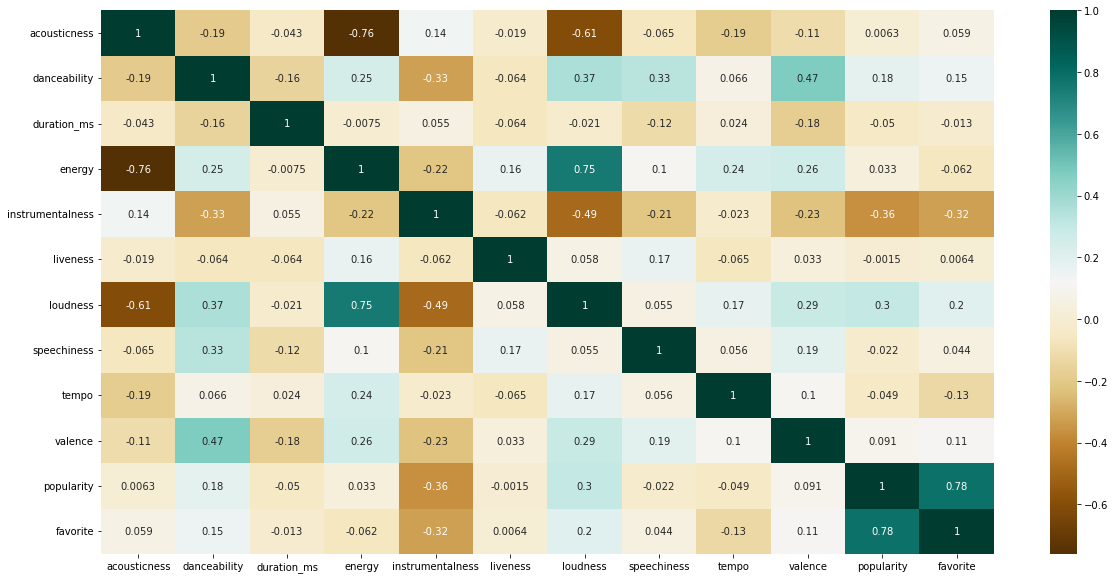

In [18]:
# Correlation Matrix of quantitative features
plt.figure(figsize=(20,10))
c = X.corr()
corr = sns.heatmap(c,cmap="BrBG",annot=True)

Of all the quantitative features, popularity, danceability, and instrumentalness have the highest associations, with popularity and danceability being positive and instrumentalness being negative. As a result, I will use these three features in my model.

Model Selection with Cross-validation and Hyperparameter Optimization
Now, I want to be able to select which classifier algorithm I want to use for our problem. In order to do this, I will compare three algorithms: Random Forest Classifier, Decision Tree Classifier, and Logistic Regression.

In [19]:
# Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Train / Split Data
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='favorite'), X.favorite,test_size = .20)


For each model, I will use cross-validation to see how well each model generalizes and obtain a F1 score.

In [21]:
%%time
# Logistic Regression
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
np.mean(lr_scores)

Wall time: 15.2 s


0.8742521740112108

In [22]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [23]:
%%time
# Decision Tree
dt = DecisionTreeClassifier(max_depth=30)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

Wall time: 1min 41s


0.9969930000201155

In [24]:
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[6,12,15,20],
    'n_estimators':[20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

{'max_depth': 20, 'n_estimators': 30}

In [25]:
%%time
# Cross-validation for RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 20, max_depth = 30))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

Wall time: 4min 24s


0.9991739036317717

Based on F1 score, we can conclude that the Random Forest Tree is the best model for our prediction problem.

Now, I will predict 'favorite' songs from the entire dataset, and get the songs that were not favorited initially but are predicted to be.

Predicting Songs and Saving Dataset for Personal Use

In [27]:
prediction = dtc.predict(future.drop(columns=['track','track_id','favorite','artist','key','time_signature','mode']))

In [28]:
future['prediction'] = prediction

In [29]:
# Gets only songs that were not favorites but are predicted to be
future = future[(future['favorite']==0) & (future['prediction'] == 1)]

In [30]:
future = future.drop(columns=['track_id','instrumentalness','danceability','duration_ms','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])

In [31]:
future

,artist,track,acousticness,energy,popularity,favorite,prediction
290,Zé Neto & Cristiano,Status Que Eu Não Queria - Ao Vivo,0.5900,0.871,74,0,1
3223,BAUM,This Body,0.1260,0.577,30,0,1
5177,Eddie Berman,You Can Call Me Al,0.8440,0.316,39,0,1
6050,Cryptic Wisdom,Last Stand,0.4720,0.605,43,0,1
6247,Kim Sung Kyu,True Love,0.1210,0.584,39,0,1
...,...,...,...,...,...,...,...
129751,George Ogilvie,Surveillance,0.7180,0.303,66,0,1
129787,Melendi,Destino o casualidad,0.5240,0.525,72,0,1
130263,Don Diablo,"Survive (feat. Emeli Sandé, Gucci Mane)",0.7140,0.772,72,0,1
130415,Gaullin,Moonlight,0.0529,0.761,86,0,1


In [32]:
# Saving csv
future.to_csv("recommendations_new.csv")